# Exercises and topics covered in TA session 6 OCT 2021

## Some basics on data structures in Python

In [2]:
### firstly, some notes on Python's data types.
x = 2 # letting x be the integer 2
print(type(x)) #making python tell what data type it is

<class 'int'>


In [3]:
y = x/2 #dividing the integer 2 with 2. y should hold the value 1 (int). However, dividing always returns the data type float (number with decimals)
print(y,type(y)) #printing y and its data type

1.0 <class 'float'>


In [4]:
### please note that y  holds the decimal number 1.0 (a float), even though we mathematically know that there is no need for the decimals given that x was an int.
### we can force the result to become an int if we like/need:
y = int(x/2)
print(y,type(y))

1 <class 'int'>


In [5]:
### we can even force numbers to be treated as string if we need to - for example when concatenating a number with a string in the print statement:
print(str(y)+' is of the type '+str(type(y))+', although we are now outputting it as a '+str(type(str(y))))

### note that I had to use str() around the type statements also to be able to concatenate them with string in a print statement

1 is of the type <class 'int'>, although we are now outputting it as a <class 'str'>


In [6]:
### str to int/float also works, in case you are provided with numerical data in a format where it is not read as int or float initially:
inputStr = '1336,1338, 1339'
### I want numbers 1336, 1338 and 1339 stored as ints. I need to split on the comma, remove whitespace and tell Python to treat them as ints, and place them in a suitable container.

listStr = inputStr.split(',')
print(listStr,'\n',type(listStr[0])) #ok I did split on comma, but the type is still str. however, they are already in a list, which seems fine.

['1336', '1338', ' 1339'] 
 <class 'str'>


In [7]:
listNum = []
for number in listStr:
    listNum.append(int(number.strip()))
print(listNum,'\n',type(listNum[0]))

[1336, 1338, 1339] 
 <class 'int'>


In [8]:
### another problem: I have list of various data types, and I want a simple understanding on what data type each item is, based on the item's index in the list:
inputList = ['some words', {'keyone':'valueone', 'keytwo':'valuetwo'},135,12.4,[1,2,3], False]
typeList = [type(item) for item in inputList]
typeList

[str, dict, int, float, list, bool]

In [9]:
dict(enumerate(typeList))

{0: str, 1: dict, 2: int, 3: float, 4: list, 5: bool}

In [10]:
### meaning my problem can be solved by this oneliner:
typeIndex = dict(enumerate([type(item) for item in inputList]))
typeIndex

{0: str, 1: dict, 2: int, 3: float, 4: list, 5: bool}

In [11]:
type(inputList[0])==typeIndex[0]### unsurprisingly, python agrees with itself and returns True on this boolean. Bool is another data type.

True

In [12]:
### as evident from above, an equals check is inherently of the data type bool. 

### the following bools highlight some pecularities of bool in python
1 == True

True

In [13]:
5 == True

False

In [14]:
bool(5) == True

True

In [15]:
bool(0.4)

True

In [16]:
bool(0)

False

In [17]:
bool("text")

True

In [18]:
bool('')

False

In [19]:
bool([])

False

In [20]:
bool([1,2])

True

## Importing CSV with numpy

In [21]:
import numpy as np
#The csv imported has been uploaded along 
#with this notebook
start_array = np.genfromtxt('sort of random data.csv',dtype='float',delimiter=';',filling_values=0)

In [22]:
#The .shape tells us number of rows, and 
#columns, respectively
start_array.shape

(26, 7)

In [23]:
#Making a slice of the array 
#to inspect one column of the data
start_array[:,4]

array([298.12,  48.93,  29.61, 151.  ,  55.1 ,  95.45,  34.4 ,  86.94,
        64.69,  34.01,  31.25, 357.19, 216.56, 233.44,  24.29, 155.  ,
       151.61, 151.  ,  47.81, 170.64,  99.36,  42.3 ,  14.94,  43.85,
       267.7 , 106.61])

Remember that NumPy has a great documentation online at numpy.org. This is an example of the documentation of np.genfromtxt as used above:
https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt

## Quick look at early steps of text processing pipeline
We only scrolled through some of these steps and commented on their functions. Here shown with example texts.

In [46]:
strings_raw = [
    'The course provides knowledge of the key concepts, techniques and methods related to machine learning. Topics include an understanding of the mathematical basics of data mining and machine learning, linear models for regression such as maximum likelihood, sequential learning, regularized least squares and classification models such as probabilistic generative models, probabilistic discriminative models. Furthermore, the course provides the students with practical hands-on experience on machine learning using open source machine learning libraries such as scikit-learn in Python programming language. The course also provides knowledge of the key concepts, techniques and methods in natural language processing to text analytics. The students gain in depth knowledge of natural language processing and will further apply this to practical scenarios with acquired skills in text classification methods. The course provides students with hands-on experience on text analytics using open source machine learning libraries such as scikit-learn, Natural Language Toolkit (NLTK) in Python programming language. After completing the course, the students will be able to apply and use appropriate machine learning techniques in various data science domains.'
    ,
    """can select appropriate machine learning methods (such as linear models, classification models, text classification, semantic textual similarity, word sense disambiguation and neural language models) and tools for a given data science problem
can analyze mathematically the performance of machine learning methods and techniques
can apply techniques from the course to new data science problems in terms of selection of appropriate machine learning methods, techniques and tools
can use python or similar to implement machine learning methods and techniques
can discuss concepts and applications of machine learning (including text)"""
    ,
    'The aim of the course is to introduce the students to the concepts '
    'and techniques of natural languages processing and analysis, '
    'unstructured information analysis and management for better '
    'decision- making by deriving valuable insights from enterprise '
    'content regardless of source or format. The course provides deep '
    'and rich knowledge of text analysis techniques and applications '
    'including sentiment analysis and opinion mining, information access '
    'and text mining, document classification, topic extraction and other '
    'techniques and applications using real-world data and cases.'
        ]

In [49]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re #regular expressions package

In [50]:
#defining what characters to keep
remove='[^A-Za-zæøå .-]' #the ^syntax designates that I want to remove anything but what is after the ^

#removing other characters
strings_lower = [re.sub(remove,'',element).lower() for element in strings_raw] 
#doing both lower case conversion, and removal of special characters in this list operation

In [51]:
#tokenizing into words
strings_words = [word_tokenize(element) for element in strings_lower] 
#I still have the punctuation after this, but that can be removed at the same time as stopwords.

In [57]:
#feel free to inspect the intermediate results at this point to see what the tokenization is doing.

In [54]:
#defining stopwords as an editable list
stops = stopwords.words()
stops.append('.')   #also adding the periods to the 
                    #list of stops as they are not needed for 
                    #bag of words which is the target 
                    #representation in this case

#removing stopwords, and any whitespace
strings_words_nonstop = [
    [word.strip() for word in string if not word.strip() in stops]  #list of lists, double for loop
    for string in strings_words
        ]

#the resulting strings_words_nonstop are sufficient for creating Bag of Words
#representations based on for example the Counter function (from Collections)

In [56]:
#While we now have our lists of lists of words, we may depending on 
#choices ahead choose to join the words together after these preprocessing steps.

#we may also choose to do more in preprocessing, for instance lemmatization/converting
#all the words to their stems, depending on how we want to tune the model.


#here's an example of joining words together again for our lists of lists 
#again with a double for loop.
strings_bow_input = [(" ").join([word for word in string]) 
               for string in strings_words_nonstop]

#regardless of imagined use case, it is easier to inspect the resulting contents after 
#preprocessing in a concatenated state than in long lists of words.
strings_bow_input

['course provides knowledge key concepts techniques methods related machine learning topics include understanding mathematical basics data mining machine learning linear models regression maximum likelihood sequential learning regularized least squares classification models probabilistic generative models probabilistic discriminative models furthermore course provides students practical hands-on experience machine learning using open source machine learning libraries scikit-learn python programming language course provides knowledge key concepts techniques methods natural language processing text analytics students gain depth knowledge natural language processing apply practical scenarios acquired skills text classification methods course provides students hands-on experience text analytics using open source machine learning libraries scikit-learn natural language toolkit nltk python programming language completing course students able apply use appropriate machine learning techniques 

## Mentioning the existence of the plotting package Matplotlib
Finally, wrapping up the session, I briefly mentioned the Matplotlib package for plotting and so on.

Matplotlib, like Numpy, has great documentation pages online, at matplotlib.org. When you get into creating visualizations of the data, whatever data you are working on, you can for example check out the guide on choosing colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

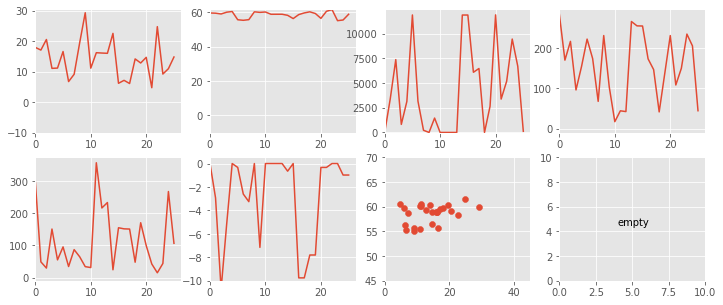

In [45]:
#The following was not covered explicitly, 
#but I highlighted that we can also discuss
#use of plots with matplotlib, including with 
#use of formatting to make the plots fit in
#reports/deliverables (color palettes, 
#fonts and sizes). Of course, also the ability
#to create various types of plots based on your
#data.

#For an CSV-file with no context provided as to
#what it contains, testing some plots could be a 
#good idea

import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, figures = plt.subplots(2,4, figsize=(12,5))

#some basic plots
for i in range(6):
    figures.reshape(8,)[i].plot( start_array[:,i])
    figures.reshape(8,)[i].set_xlim(0,)
    figures.reshape(8,)[i].set_ylim(-10,)

#a scatter plot of first two columns as x, y, respectively
figures.reshape(8,)[6].scatter(start_array[:,0],start_array[:,1])
figures.reshape(8,)[6].set_xlim(0,45)
figures.reshape(8,)[6].set_ylim(45,70)

#and last square is empty
figures.reshape(8,)[7].text(4.,4.5,'empty')
figures.reshape(8,)[7].set_xlim(0,10)
figures.reshape(8,)[7].set_ylim(0,10)

plt.show()